# Neural Network from scratch using Numpy

In [39]:
from google.colab import files

# Upload kaggle.json manually
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shashi1305","key":"f9ab14b3ce67ce6629dd7837667f74da"}'}

In [40]:
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Secure the file


In [41]:
!kaggle datasets list


ref                                                               title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                          Car Price Dataset                            135KB  2025-01-26 19:53:28          12472        182  1.0              
adilshamim8/education-and-career-success                          Education & Career Success.                  118KB  2025-02-03 05:24:20           2969         55  1.0              
anandshaw2001/netflix-movies-and-tv-shows                         Netflix Movies and TV Shows                    1MB  2025-01-03 10:33:01          20059        497  1.0              
hubertsidorowicz/football-players-stats-2024-2025                 Football Players St

In [42]:
!kaggle competitions download -c digit-recognizer


digit-recognizer.zip: Skipping, found more recently modified local copy (use --force to force download)


In [43]:
!unzip digit-recognizer.zip -d digit_recognizer_data


Archive:  digit-recognizer.zip
replace digit_recognizer_data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Update the file path to where you extracted it
data = pd.read_csv("digit_recognizer_data/train.csv")

# Check the first few rows to confirm it’s loaded correctly
print(data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [45]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [46]:
Y_train

array([4, 8, 8, ..., 6, 6, 4])

In [47]:
# He Initialization Applied
def init_params():
    W1 = np.random.randn(10, 784) * np.sqrt(2 / 784)  # He Initialization
    b1 = np.zeros((10, 1))  # Bias initialized to zero
    W2 = np.random.randn(10, 10) * np.sqrt(2 / 10)  # He Initialization
    b2 = np.zeros((10, 1))  # Bias initialized to zero
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

# Softmax Applied
def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Prevents overflow
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [48]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [49]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 600)

Iteration:  0
[0 5 0 ... 0 7 0] [4 8 8 ... 6 6 4]
0.08285365853658537
Iteration:  10
[4 5 9 ... 0 0 4] [4 8 8 ... 6 6 4]
0.2583170731707317
Iteration:  20
[4 9 9 ... 0 0 4] [4 8 8 ... 6 6 4]
0.3082439024390244
Iteration:  30
[4 9 9 ... 0 6 9] [4 8 8 ... 6 6 4]
0.3655609756097561
Iteration:  40
[4 9 9 ... 0 6 9] [4 8 8 ... 6 6 4]
0.41521951219512193
Iteration:  50
[4 9 9 ... 6 6 9] [4 8 8 ... 6 6 4]
0.4998292682926829
Iteration:  60
[4 8 8 ... 6 6 9] [4 8 8 ... 6 6 4]
0.5980975609756097
Iteration:  70
[4 8 8 ... 6 6 4] [4 8 8 ... 6 6 4]
0.7339756097560975
Iteration:  80
[4 8 8 ... 6 6 4] [4 8 8 ... 6 6 4]
0.775829268292683
Iteration:  90
[4 8 8 ... 6 6 3] [4 8 8 ... 6 6 4]
0.8005121951219513
Iteration:  100
[4 8 8 ... 6 6 3] [4 8 8 ... 6 6 4]
0.8165853658536585
Iteration:  110
[4 8 8 ... 6 6 3] [4 8 8 ... 6 6 4]
0.8306829268292683
Iteration:  120
[4 8 8 ... 6 6 2] [4 8 8 ... 6 6 4]
0.8413414634146341
Iteration:  130
[4 8 8 ... 6 6 2] [4 8 8 ... 6 6 4]
0.8498536585365853
Iteration:  140


In [50]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


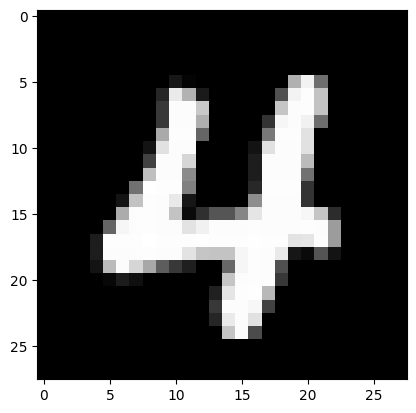

Prediction:  [8]
Label:  8


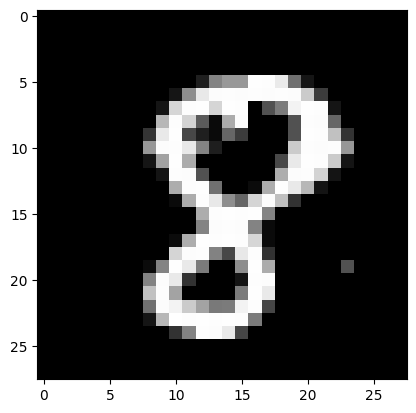

Prediction:  [8]
Label:  8


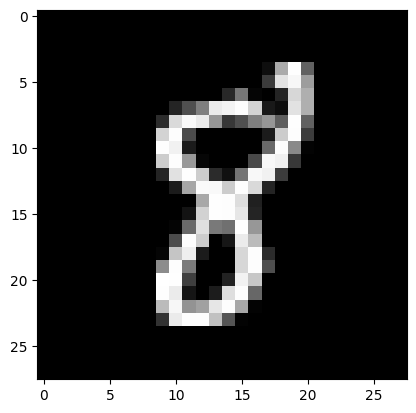

Prediction:  [9]
Label:  9


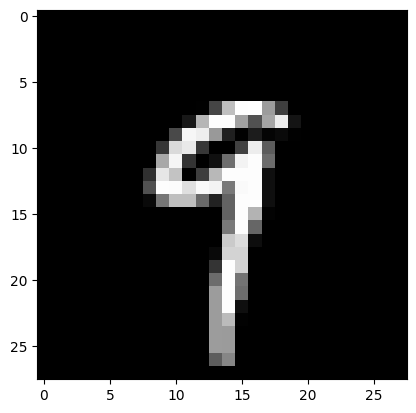

In [51]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [52]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 6 3 2 1 2 8 8 5 3 3 9 1 3 3 8 7 7 3 2 7 0 3 7 8 3 2 5 8 5 1 6 9 9 5 1 4
 5 1 2 3 8 3 7 9 3 6 0 1 9 9 0 3 5 1 1 6 0 5 0 7 4 4 8 5 0 6 3 6 2 0 0 4 5
 7 5 7 1 3 5 5 3 1 8 8 5 2 5 5 4 0 7 3 5 0 4 0 9 0 0 6 1 8 6 5 2 8 7 2 9 7
 0 2 0 1 1 7 3 5 9 9 1 2 4 0 4 0 3 0 8 3 1 8 7 1 1 5 7 6 8 0 0 8 1 2 8 4 4
 8 6 5 3 3 0 7 9 5 9 8 9 3 7 3 5 3 7 0 4 2 9 2 5 7 0 4 8 7 2 5 9 9 5 2 1 4
 7 3 1 0 2 4 7 8 1 4 1 3 4 5 0 3 9 1 5 2 3 9 6 0 1 7 9 9 0 2 0 2 2 1 4 9 8
 8 8 7 0 2 5 1 6 8 8 6 1 7 6 4 9 8 8 7 8 1 3 7 7 0 5 9 0 3 5 7 7 8 0 2 1 4
 8 3 2 7 4 1 7 1 3 0 5 5 6 0 3 5 7 5 9 1 2 3 7 8 3 3 9 1 4 7 0 4 4 4 0 5 4
 9 3 4 7 6 0 2 8 9 9 5 3 2 7 6 7 7 5 8 3 6 7 5 2 1 9 1 3 9 1 5 3 0 0 5 4 0
 2 3 1 4 8 4 1 1 1 0 3 3 7 1 5 5 1 7 9 1 3 4 5 6 1 1 7 7 2 5 0 1 3 2 2 3 5
 0 4 2 8 8 4 1 6 8 0 6 1 9 4 7 6 4 7 5 1 8 1 3 0 7 2 4 0 2 6 8 1 6 1 1 4 9
 8 8 5 2 5 3 4 9 3 3 0 0 3 5 5 1 1 8 0 3 9 1 5 4 1 6 2 2 8 1 0 6 4 7 3 0 0
 6 7 5 1 1 8 1 8 0 4 1 6 2 3 2 5 3 8 9 6 0 8 6 7 7 5 7 4 6 6 1 1 4 7 8 2 5
 9 4 3 2 3 4 2 1 9 5 7 8 

0.917

# Neural Network using Tensorflow

In [53]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
# Load dataset
data = pd.read_csv("digit_recognizer_data/train.csv")
data = np.array(data)
np.random.shuffle(data)  # Shuffle before splitting

In [55]:
# Split dataset into training and development sets
X_train = data[1000:, 1:] / 255.0  # Normalize pixel values
Y_train = data[1000:, 0]

X_dev = data[:1000, 1:] / 255.0
Y_dev = data[:1000, 0]

In [56]:
# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(784,)),  # Hidden Layer 1
    keras.layers.Dense(10, activation='softmax')  # Output Layer (10 classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),  # Adaptive gradient optimizer
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']
)

In [58]:
# Train the model
history = model.fit(X_train, Y_train, epochs=25, batch_size=32, validation_data=(X_dev, Y_dev))


Epoch 1/25
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8828 - loss: 0.3812 - val_accuracy: 0.9540 - val_loss: 0.1328
Epoch 2/25
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9526 - loss: 0.1561 - val_accuracy: 0.9620 - val_loss: 0.1223
Epoch 3/25
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9634 - loss: 0.1277 - val_accuracy: 0.9550 - val_loss: 0.1720
Epoch 4/25
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9661 - loss: 0.1207 - val_accuracy: 0.9620 - val_loss: 0.1602
Epoch 5/25
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9700 - loss: 0.1028 - val_accuracy: 0.9640 - val_loss: 0.1588
Epoch 6/25
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9698 - loss: 0.1064 - val_accuracy: 0.9590 - val_loss: 0.1685
Epoch 7/25
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9733 - loss: 0.0965 - val_accuracy: 0.9630 - val_loss: 0.1483
Epoch 8/25
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9743 - loss: 0.0972 - 

In [59]:
# Evaluate on the development set
dev_loss, dev_accuracy = model.evaluate(X_dev, Y_dev)
print(f"Development Set Accuracy: {dev_accuracy:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9628 - loss: 0.3211
Development Set Accuracy: 0.9610


In [60]:
# Make predictions
def test_prediction(index):
    prediction = np.argmax(model.predict(X_train[index:index+1]), axis=1)
    label = Y_train[index]

    print(f"Prediction: {prediction[0]}, Label: {label}")
    plt.imshow(X_train[index].reshape(28, 28), cmap="gray")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Prediction: 2, Label: 2


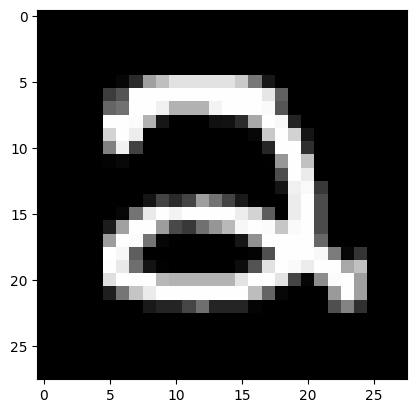

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: 3, Label: 3


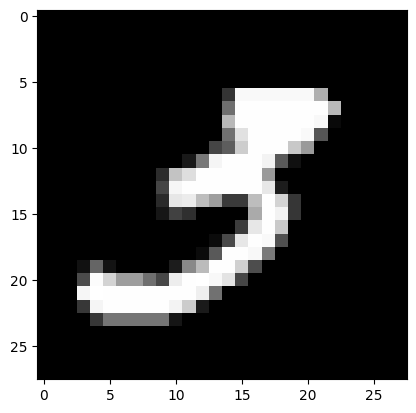

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: 8, Label: 8


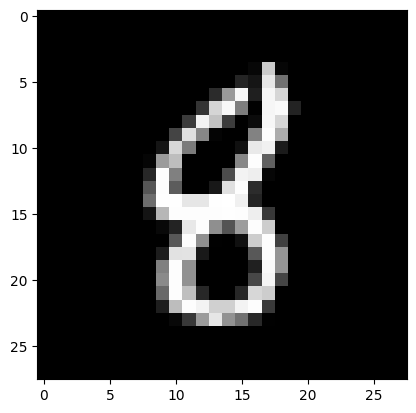

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: 4, Label: 4


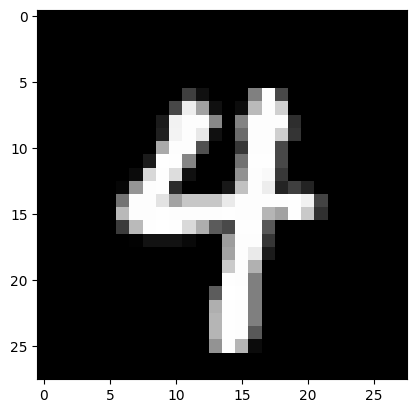

In [61]:
# Test some predictions
test_prediction(0)
test_prediction(1)
test_prediction(2)
test_prediction(3)

In [62]:
# Evaluate the model on the development set
dev_loss, dev_accuracy = model.evaluate(X_dev, Y_dev)

# Print Development Set Accuracy
print(f"Development Set Accuracy: {dev_accuracy:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9628 - loss: 0.3211
Development Set Accuracy: 0.9610
